# Biomedical Digital Image Processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import defaultdict
import cv2
from utils import *

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['font.size'] = 5

### Base Image

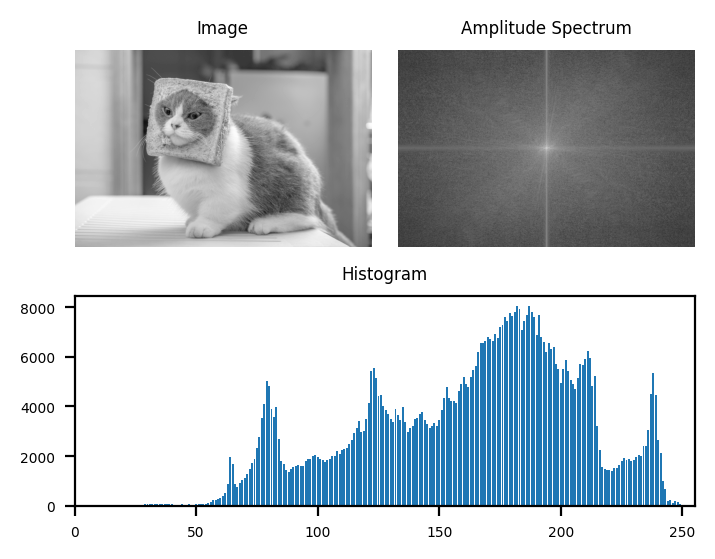

In [2]:
# Loac Image
img = np.asarray(Image.open('cat.png').convert('L'))

# Show Image
visualize(img)
plt.savefig('./img/03_base.png', dpi=150, bbox_inches='tight')

---
# 05. Enhancement in Frequency Domain

### Filtering in Frequency Domain

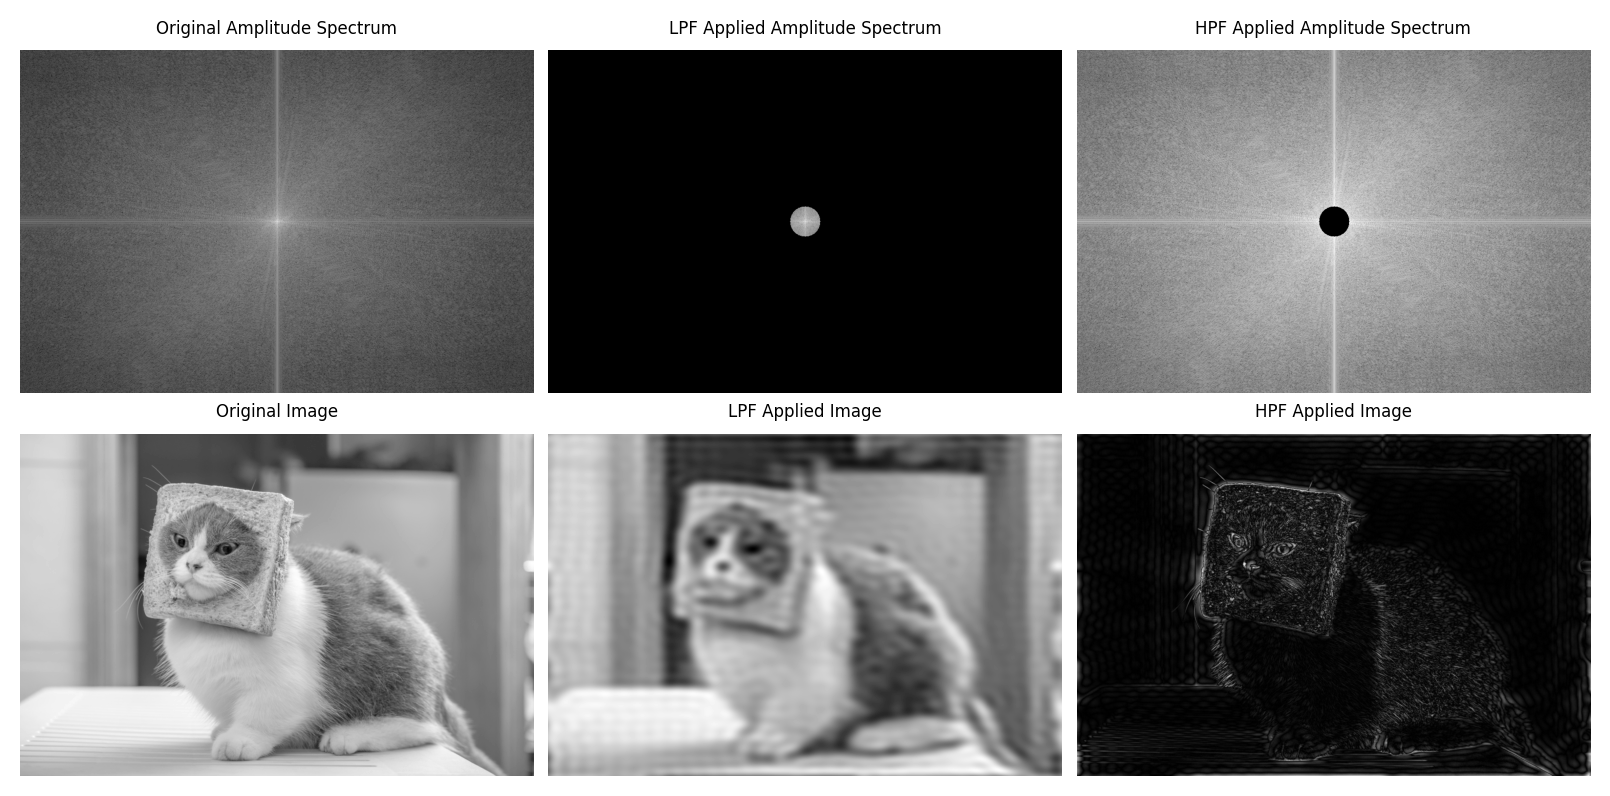

In [53]:
plt.figure(figsize=(8, 4))

# img
img = np.asarray(Image.open('cat.png').convert('L'))
img_freq = np.fft.fft2(img)
img_freq = np.fft.fftshift(img_freq)

# LPF
r = 30
img_freq_lpf = img_freq.copy()
y, x = np.ogrid[:img.shape[0], :img.shape[1]]
distance_from_center = np.sqrt((x - img.shape[1]//2)**2 + (y - img.shape[0]//2)**2)
LPF = distance_from_center <= r
img_freq_lpf *= LPF
img_lpf = np.fft.ifft2(np.fft.fftshift(img_freq_lpf))

# HPF
HPF = distance_from_center>r
img_freq_hpf = img_freq * HPF
img_hpf = np.fft.ifft2(np.fft.fftshift(img_freq_hpf))

plt.subplot(2, 3, 1)
plt.imshow(20*np.log(abs(img_freq)), cmap='gray')
plt.axis('off')
plt.title('Original Amplitude Spectrum')

plt.subplot(2, 3, 4)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(20*np.log(abs(img_freq_lpf+1)), cmap='gray')
plt.axis('off')
plt.title('LPF Applied Amplitude Spectrum')

plt.subplot(2, 3, 5)
plt.imshow(abs(img_lpf), cmap='gray')
plt.axis('off')
plt.title('LPF Applied Image')

plt.subplot(2, 3, 3)
plt.imshow(20*np.log(abs(img_freq_hpf+1)), cmap='gray')
plt.axis('off')
plt.title('HPF Applied Amplitude Spectrum')

plt.subplot(2, 3, 6)
plt.imshow(abs(img_hpf), cmap='gray')
plt.axis('off')
plt.title('HPF Applied Image')

plt.tight_layout()
plt.savefig('./img/05.png', dpi=200, bbox_inches='tight')